In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [3]:
#Reading the dataset in default which is already present 
(train_images,train_labels),(test_images,test_labels) = datasets.mnist.load_data()

#greyscale image 
train_images , test_images = train_images/255.0,test_images/255.0

train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))



In [4]:
model = models.Sequential([

    #Convolution layer
    layers.Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)),
    # maxpooling method
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    
    layers.Dense(128,activation='relu'),

    layers.Dense(10,activation='softmax')
])

C:\Users\ELCOT\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
history = model.fit(train_images,train_labels,epochs=1,validation_data=(test_images,test_labels))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 107s 44ms/step - accuracy: 0.9016 - loss: 0.3114 - val_accuracy: 0.9828 - val_loss: 0.0531


In [7]:
history = model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.9858 - loss: 0.0448 - val_accuracy: 0.9876 - val_loss: 0.0362
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 45ms/step - accuracy: 0.9913 - loss: 0.0277 - val_accuracy: 0.9886 - val_loss: 0.0355
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 157s 53ms/step - accuracy: 0.9933 - loss: 0.0203 - val_accuracy: 0.9929 - val_loss: 0.0236
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 148s 56ms/step - accuracy: 0.9964 - loss: 0.0122 - val_accuracy: 0.9922 - val_loss: 0.0247
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 56ms/step - accuracy: 0.9970 - loss: 0.0094 - val_accuracy: 0.9912 - val_loss: 0.0306
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 54ms/step - accuracy: 0.9968 - loss: 0.0097 - val_accuracy: 0.9919 - val_loss: 0.0301
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 51ms/step - accuracy: 0.9975 - loss: 0.0074 - val_accuracy: 0.9912 - val_loss: 0.0336
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 149s 55ms/step - accuracy: 0.

In [15]:
test_loss , test_acc =model.evaluate(test_images,test_labels)
print(f"Test Accuracy:{test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9897 - loss: 0.0406
Test Accuracy:0.9914


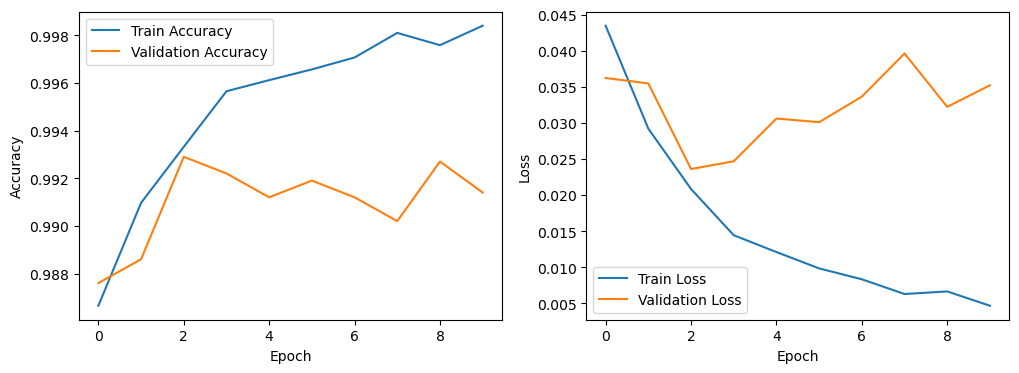

In [19]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
import numpy as np

sample_image = test_images[0].reshape(1,28,28,1)
prediction = model.predict(sample_image)
predicted_label=np.argmax(prediction)

print(f"Predicted Label:{predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
Predicted Label:7
